# ScalerMart Sales Decline: A Data-Driven Approach to Customer Insights and Sales Improvement

## Problem Statement:
ScalerMart, a leading global electronics retailer, has faced a concerning decline in sales, experiencing a nearly 50% revenue drop in 2020 compared to 2019. This report aims to leverage customer-level transactional data to identify the root causes behind this substantial sales decrease.

## Objective:
Through in-depth analysis, this study will uncover customer buying patterns, product trends, and potential market shifts that might be contributing to the decline. By gaining these insights, the report will recommend data-driven strategies for ScalerMart to improve sales performance and regain its market position.

## Importing required Libraries

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Customer, Product and Sales Data Sets

In [5]:
cust = pd.read_csv('Customers.csv', encoding='unicode_escape')
prod = pd.read_csv('Products.csv')
sales = pd.read_csv('Sales.csv')

# 1. EDA of Customer Data

In [738]:
cust.shape

(15266, 11)

Customer data has 15266 rows and 11 columns.

In [737]:
cust.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,year
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939,1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979,1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947,1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957,1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965,1965


In [119]:
cust.dtypes

CustomerKey     int64
Gender         object
Name           object
City           object
State Code     object
State          object
Zip Code       object
Country        object
Continent      object
Birthday       object
dtype: object

In [12]:
cust.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

Filling null values with 'NA' as they are state codes.

In [33]:
cust.fillna('NA',inplace=True)

In [292]:
cust.isnull().sum()

CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
year           0
dtype: int64

Customer data is now free of null values and is ready for analysis.

In [202]:
print("Following is the UniqueCount of columns in customer data")
for i in list(cust.columns):
              print(i, ' : ',cust[i].nunique())

Following is the UniqueCount of columns in customer data
CustomerKey  :  15266
Gender  :  2
Name  :  15118
City  :  8258
State Code  :  468
State  :  512
Zip Code  :  9505
Country  :  8
Continent  :  3
Birthday  :  11270
year  :  68


Slicing year from customer date of birth to analyze the which customer group demograpics.

In [121]:
cust['Birthday']= cust['Birthday'].astype(str)

In [123]:
cust['Birthday'].values

array(['7/3/1939', '9/27/1979', '5/26/1947', ..., '11/9/1937',
       '10/12/1937', '8/18/1965'], dtype=object)

In [136]:
cust['year'] = cust['Birthday'].str.slice(-1, -5,-1).str[::-1]

## Univariate Analysis of Customer Data

<function matplotlib.pyplot.show(close=None, block=None)>

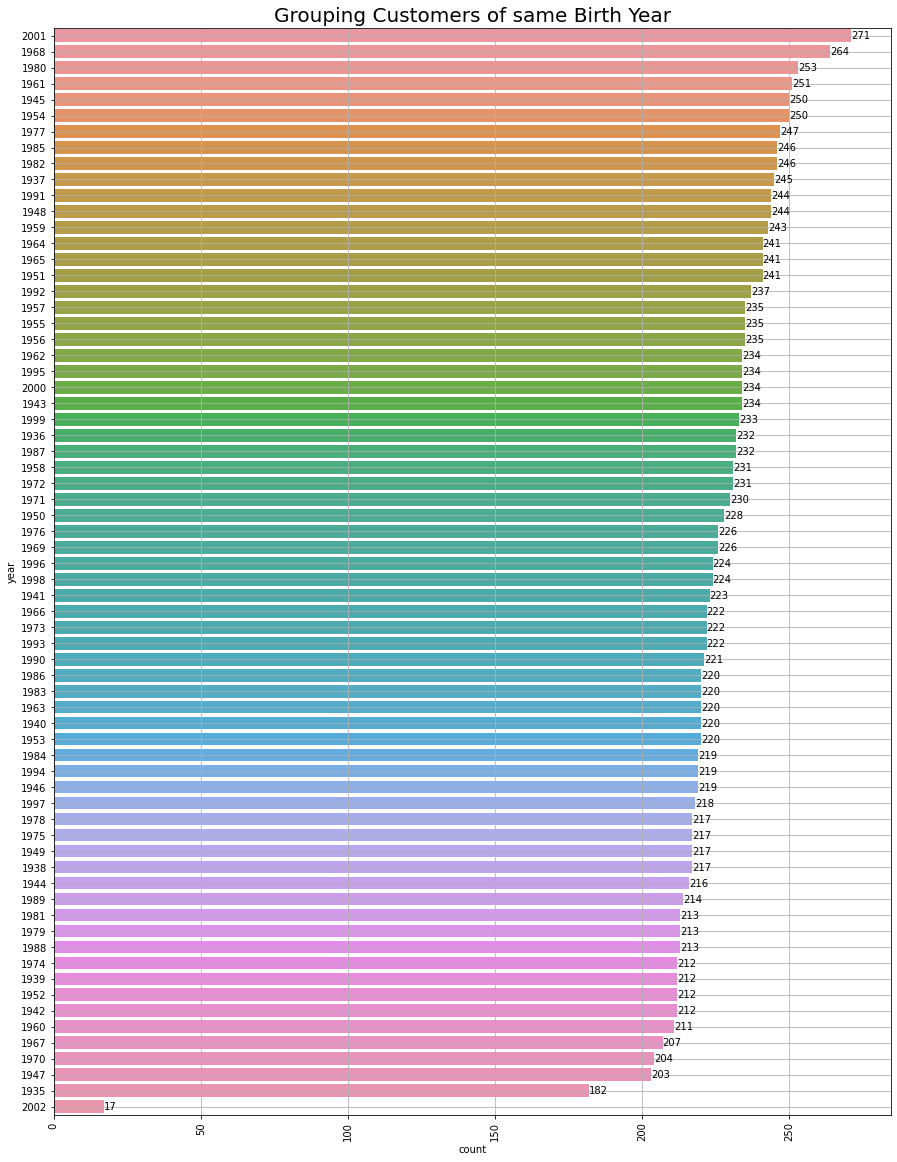

In [739]:
#Grouping Customers of same Birth Year
plt.figure(figsize=(15,20))
ax=sns.countplot(y=cust['year'],order = cust['year'].value_counts().index)
plt.grid(True)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=90)
plt.title("Grouping Customers of same Birth Year", fontsize=20)
plt.show

Insights:
    
    Maximum customer base were born in the year 2001 and next to it comes 1968,1980,1961. where there is no much trend observed w.r.t to birth year.

In [740]:
#analysing some categorical columns
cust_cat_cols=['Gender','Country','Continent']

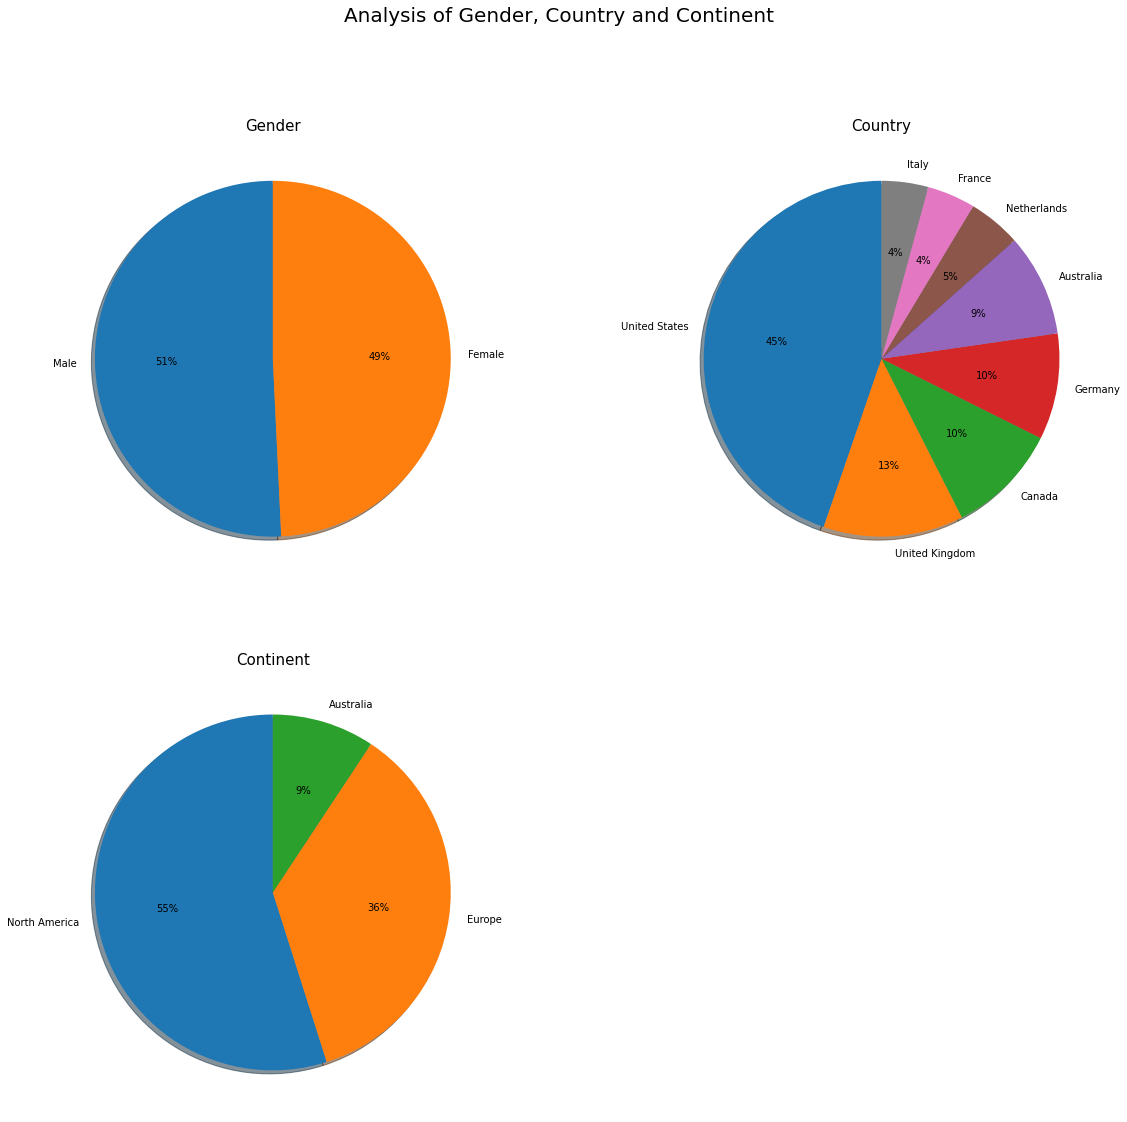

In [276]:
fig = plt.figure(figsize=(20,18))
for n,col in enumerate(cust_cat_cols): 
    plt.subplot(int(len(cust_cat_cols)/2 +1), 2, n+1)
    plt.pie(list(cust[col].value_counts().values),
            labels = list(cust[col].value_counts().index), autopct='%.0f%%', shadow= True, 
            startangle = 90,  radius= 1)
    plt.title(col, fontsize = 15)
    plt.xticks(rotation = 45)
fig.suptitle("Analysis of Gender, Country and Continent", fontsize= 20, color = 'black')
plt.show()

Insights: 
    
    51% of the customers are Male and 49% are Female.
    45% of the customers are from United states, 13% from UK, 10% Canada and 10% Germany.
    55% of customrs are from NorthAmerica, 36% from Europe and 9% from Australia
    

## Bivariate Analysis Of Customer Data

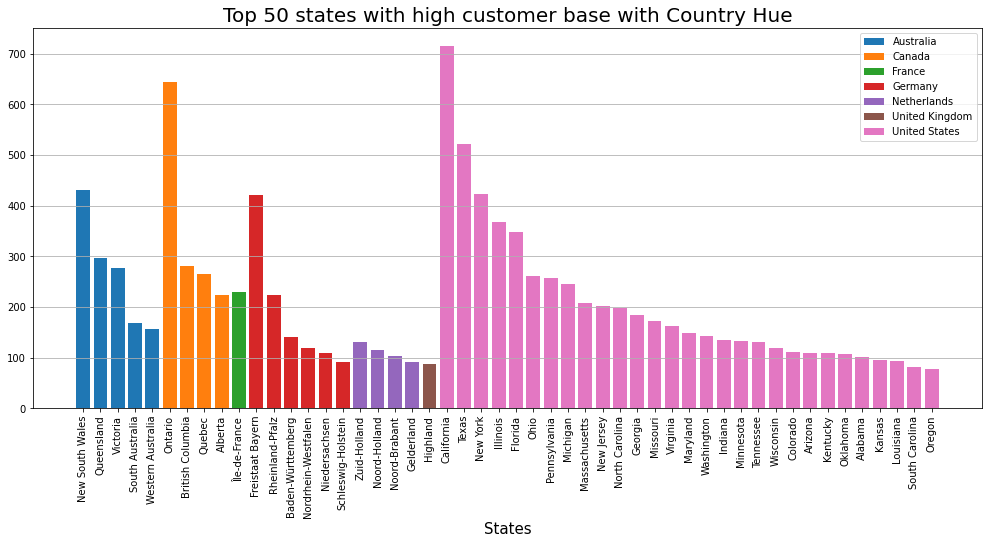

In [260]:
#top 50 states with highest number of customers from each country
## grouping data by country and state , counting each type in each group
group_data = cust.groupby(['Country','State']).size().sort_values(ascending=False)[0:50].reset_index(name='count')

plt.figure(figsize=(17,7))

for country,group in group_data.groupby('Country'):
    plt.bar(group['State'],group['count'],label=country)
plt.grid(True, axis='y')
plt.xlabel('States', fontsize=15)
plt.title('Top 50 states with high customer base with Country Hue', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insight:
    
    US,Canada,Germany and Australia are the countryies having states with highest coustomer base.
    California is the top state with more than 700 customers, next comes Ontario with 650 customers and next comes texas with more than 500 customers.
    Follows other states Newyork,Frelsaat Bayern,New South Wales,Illions, Florida,Qeensland, British Columbia.
    

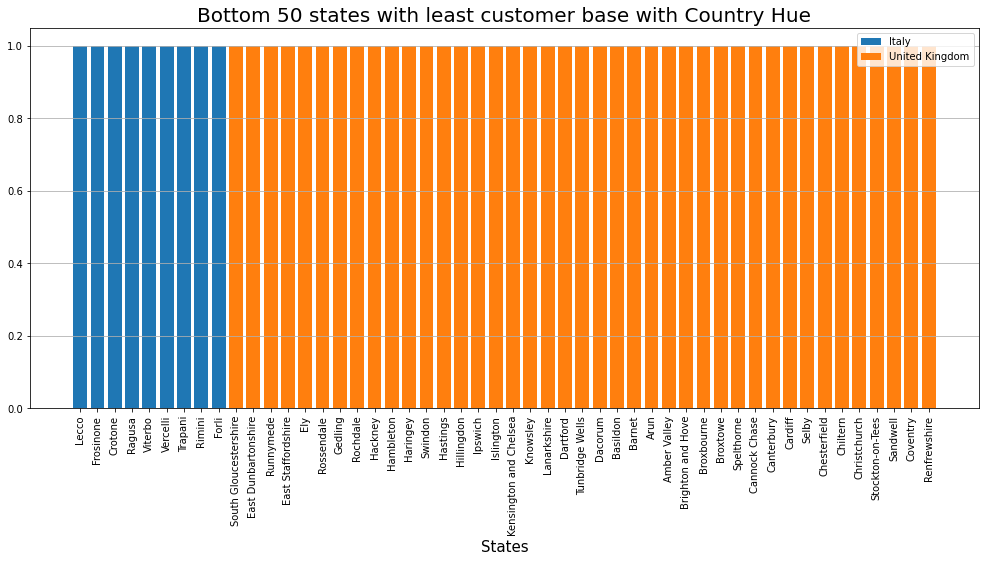

In [741]:
#Bottom 50 states with highest number of customers from each country
## grouping data by country and state , counting each type in each group
group_data = cust.groupby(['Country','State']).size().sort_values(ascending=True)[0:50].reset_index(name='count')

plt.figure(figsize=(17,7))

for country,group in group_data.groupby('Country'):
    plt.bar(group['State'],group['count'],label=country)
plt.grid(True, axis='y')
plt.xlabel('States', fontsize=15)
plt.title('Bottom 50 states with least customer base with Country Hue', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    Italy and Uk are having most of the least customer states where the organization can concentrate to increase their sales.
    

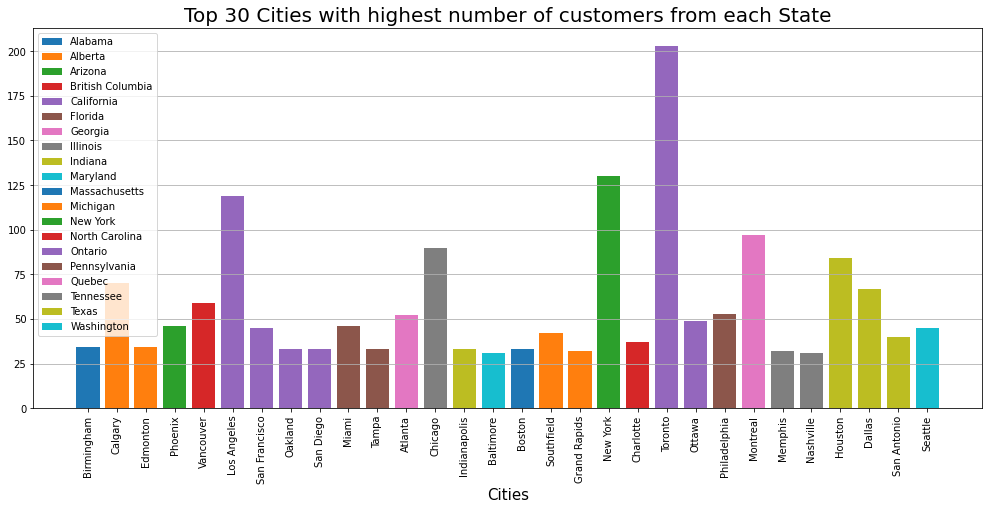

In [272]:
#Top 50 Cities with highest number of customers from each State
## grouping data by state and city , counting each type in each group
group_city_data = cust.groupby(['State','City']).size().sort_values(ascending=False)[0:30].reset_index(name='count')

plt.figure(figsize=(17,7))

for state,group in group_city_data.groupby('State'):
    plt.bar(group['City'],group['count'],label=state)
plt.grid(True, axis='y')
plt.xlabel('Cities', fontsize=15)
plt.title('Top 30 Cities with highest number of customers from each State', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    Toranto From Ontrio and Losangeles from California are the cities with highest customer base.

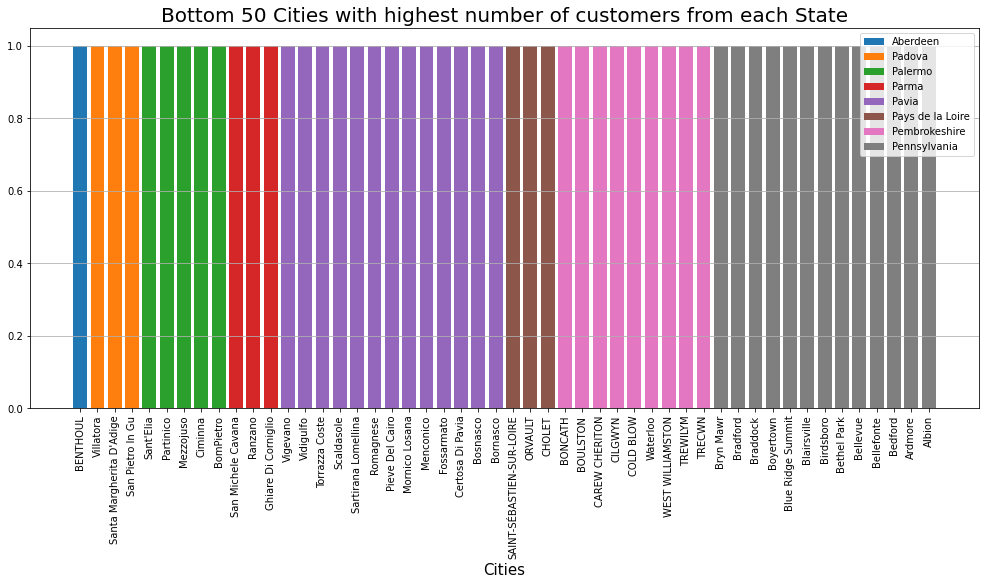

In [274]:
#Botton 50 Cities with highest number of customers from each State
## grouping data by state and city , counting each type in each group
group_city_data = cust.groupby(['State','City']).size().sort_values(ascending=True)[0:50].reset_index(name='count')

plt.figure(figsize=(17,7))

for state,group in group_city_data.groupby('State'):
    plt.bar(group['City'],group['count'],label=state)
plt.grid(True, axis='y')
plt.xlabel('Cities', fontsize=15)
plt.title('Bottom 50 Cities with highest number of customers from each State', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    Pavia and Pensnsylvania are the states that can be concentrated for improving sales.

In [ ]:
## grouping data by state and type , counting each type in each group
group_data = df.groupby(['state','type']).size().reset_index(name='count')

plt.figure(figsize=(10,10))

for state,group in group_data.groupby('state'):
    plt.bar(group['type'],group['count'],label=state)
    
plt.xlabel('type')    
plt.ylabel('count')
plt.title('count of EV types by state')
plt.xticks(rotation=90)
plt.legend()
plt.show()

# 2. EDA of Product Data

In [742]:
prod.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,profit
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,0.62,2.99,101,MP4&MP3,1,Audio,2.37
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,0.62,2.99,101,MP4&MP3,1,Audio,2.37
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,0.40,4.52,101,MP4&MP3,1,Audio,4.12
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,1.00,1.57,101,MP4&MP3,1,Audio,0.57
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,1.00,1.57,101,MP4&MP3,1,Audio,0.57


In [277]:
prod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


Insights:
    
    No null values found

In [301]:
prod.shape

(2517, 10)

There are 2517 rows and 10 columns in Product data

In [280]:
print(list(prod.columns))

['ProductKey', 'Product Name', 'Brand', 'Color', 'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory', 'CategoryKey', 'Category']


In [282]:
print('Number of unique items for each column in product data')
for col in list(prod.columns):
    print(col," : ",prod[col].nunique())

Number of unique items for each column in product data
ProductKey  :  2517
Product Name  :  2517
Brand  :  11
Color  :  16
Unit Cost USD  :  480
Unit Price USD  :  426
SubcategoryKey  :  32
Subcategory  :  32
CategoryKey  :  8
Category  :  8


Insights:
    
    Product Name and Product Key are unique. Analysis can be made on other columns.

### Univariate Analysis of Product Data

In [284]:
prod_cols=['Brand', 'Color', 'CategoryKey', 'Category']

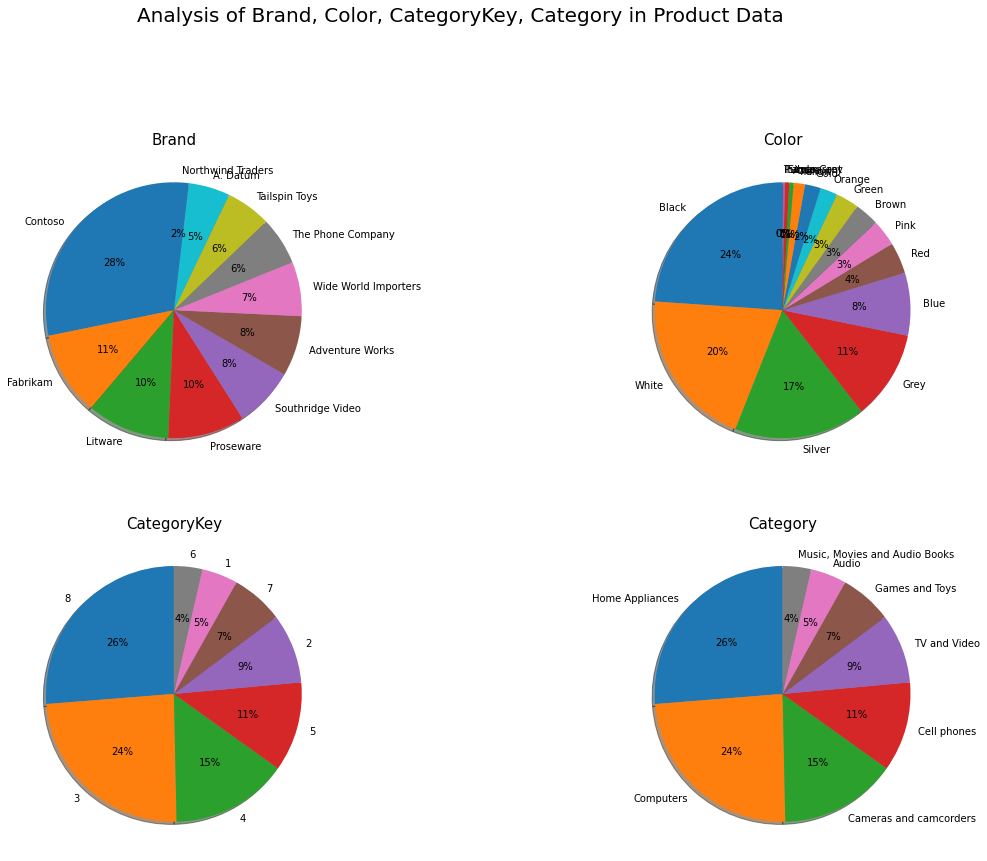

In [290]:
fig = plt.figure(figsize=(20,20))
for n,col in enumerate(prod_cols): 
    plt.subplot(int(len(prod_cols)/2 +1), 2, n+1)
    plt.pie(list(prod[col].value_counts().values),
            labels = list(prod[col].value_counts().index), autopct='%.0f%%', shadow= True, 
            startangle = 90,  radius= 1)
    plt.title(col, fontsize = 15)
    plt.yticks(rotation = 90)
fig.suptitle("Analysis of Brand, Color, CategoryKey, Category in Product Data", fontsize= 20, color = 'black')
plt.show()

Insights:
    
    Contoso, Fabrikam, Litware and Poseware are the leading product brands in the product data with 28, 11 10 and 10 Percent of overall products respectively.
    Black, White,Silver, Grey are the more produced colors.
    Home Appliances, Computers, Cameras & Camcorders and Cell phones are the highest percent occupiers with 26, 24, 15, 11 percent of overall product Category respectively.
    

### Bivariate Analysis of Product Data

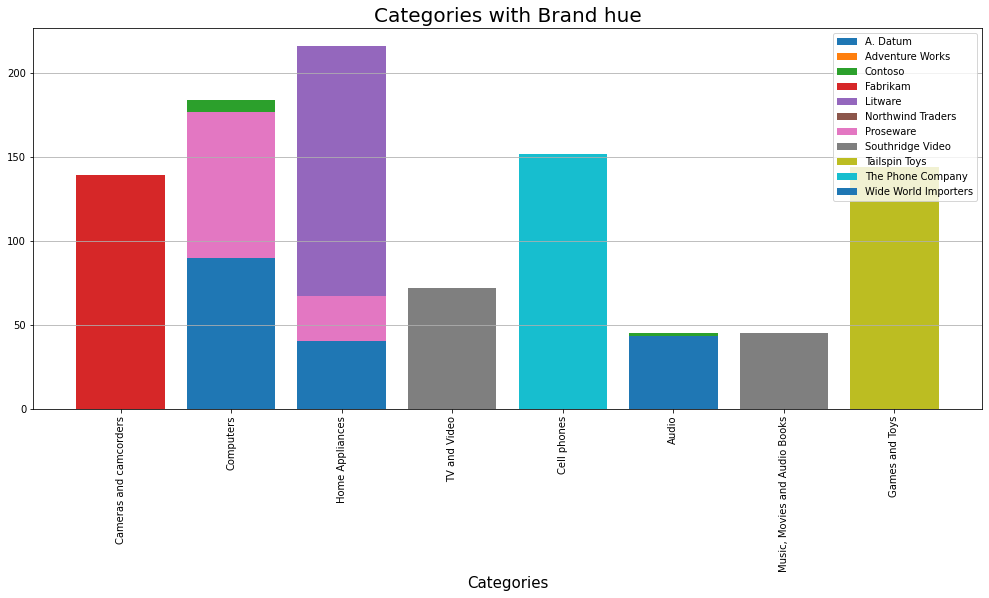

In [319]:
## grouping data by Brand and Category 
group_subcat_data = prod.groupby(['Brand','Category']).size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(17,7))

for brand,group in group_subcat_data.groupby('Brand'):
    plt.bar(group['Category'],group['count'],label=brand)
plt.grid(True, axis='y')
plt.xlabel('Categories', fontsize=15)
plt.title('Categories with Brand hue', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    Even if Contoso is the brand selling highest number of products it has limited categories like computers and audio.
    Litware is the brand exclusive for Home Appliances.
    The Phone Company is exclusive Cellphone brand.
    Fabricam is the brand selling Cameras and camcorders.
    WorldWideImporters ia the brand with categories like Computers, Audio and HomeAppliances.
    Tailspin Toys is an exclusive Games and Toy brand.
    Porsware is a brand selling Computers and HomeAppliances.
    NorthWindTraders is an exclusive HomAppliances seller.
    

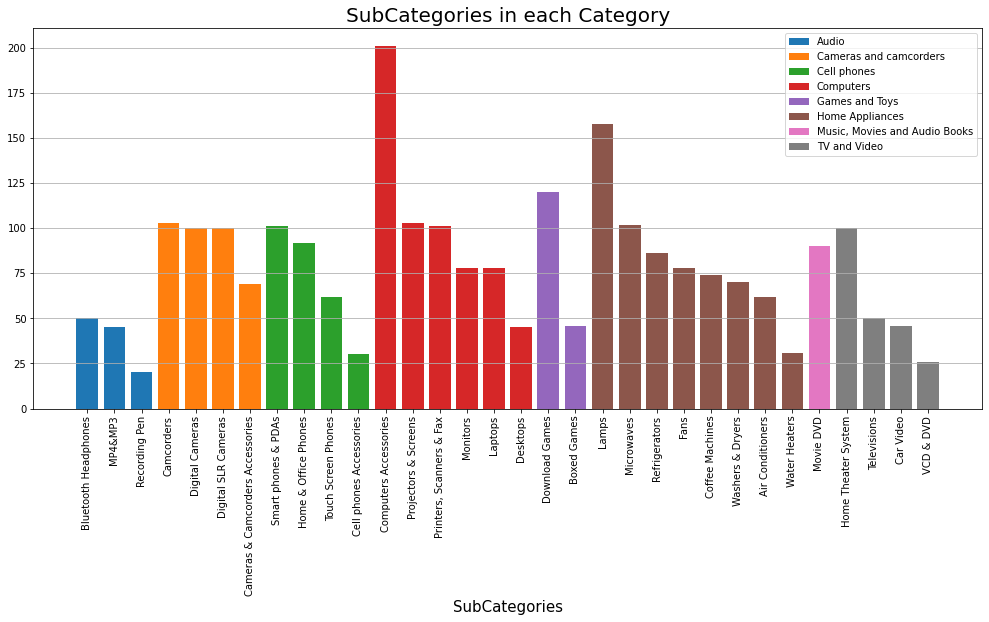

In [315]:
## grouping data by Category and subcategory , counting each type in each group
group_subcat_data = prod.groupby(['Category','Subcategory']).size().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(17,7))

for cat,group in group_subcat_data.groupby('Category'):
    plt.bar(group['Subcategory'],group['count'],label=cat)
plt.grid(True, axis='y')
plt.xlabel('SubCategories', fontsize=15)
plt.title('SubCategories in each Category', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    HomeAppliances  and computers are the highest sold categories with includes brands like WorldWideImporters, Contoso and Litware.
    Computers&Accessories, Lamps and DownloadedGames are the subcategories sold more from the categories Computers, HomeAppliances and Games & Toys respectively.
    

In [332]:
prod.dtypes

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object

In [337]:
#Removing $ from values and converting into float type
prod['Unit Cost USD']=prod['Unit Cost USD'].str[1:]
prod['Unit Cost USD'] = prod['Unit Cost USD'].str.replace(',', '')

In [336]:
prod['Unit Price USD']=prod['Unit Price USD'].str[1:]
prod['Unit Price USD'] = prod['Unit Price USD'].str.replace(',', '')

In [338]:
prod['Unit Cost USD']=prod['Unit Cost USD'].astype(float)
prod['Unit Price USD']=prod['Unit Price USD'].astype(float)

In [339]:
#Calculating profit and adding profit column
prod['profit']=prod['Unit Price USD']-prod['Unit Cost USD']

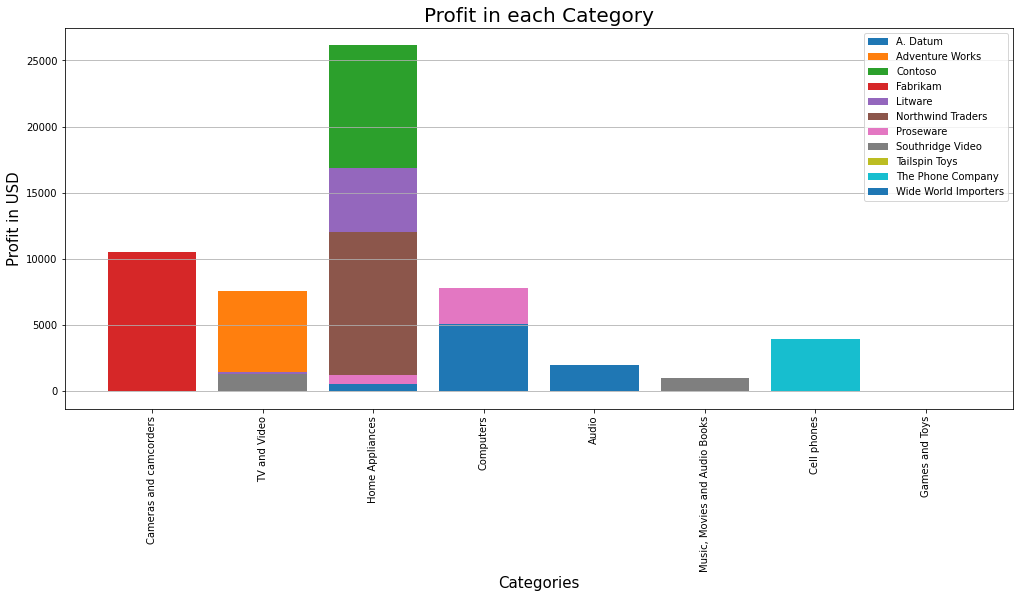

In [343]:
## grouping data by Category and subcategory , counting each type in each group
group_profit_data = prod.groupby(['Brand','Category'])['profit'].sum().sort_values(ascending=False).reset_index(name='count')

plt.figure(figsize=(17,7))

for brand,group in group_profit_data.groupby('Brand'):
    plt.bar(group['Category'],group['count'],label=brand)
plt.grid(True, axis='y')
plt.xlabel('Categories', fontsize=15)
plt.ylabel('Profit in USD', fontsize=15)
plt.title('Profit in each Category', fontsize='20')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Insights:
    
    Home Appliances is the category with highest profits with 2.5k USD.
    Next to it is Camreras and Camrecorders fom the brand Fabrikam.
    Least profit category is Muisc,movies and Audiobooks from SouthRidge Video which inturn is the least profit brand.

# 3. EDA for Sales Data

In [59]:
sales.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD


In [349]:
sales.dtypes

Order Number              int64
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey               int64
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object

In [345]:
sales.shape

(62884, 9)

In [60]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Order Number   62884 non-null  int64 
 1   Line Item      62884 non-null  int64 
 2   Order Date     62884 non-null  object
 3   Delivery Date  13165 non-null  object
 4   CustomerKey    62884 non-null  int64 
 5   StoreKey       62884 non-null  int64 
 6   ProductKey     62884 non-null  int64 
 7   Quantity       62884 non-null  int64 
 8   Currency Code  62884 non-null  object
dtypes: int64(6), object(3)
memory usage: 4.3+ MB


In [61]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [390]:
sales[sales.isnull().any(axis=1)]

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
97,368000,1,2016-01-03,NaT,892838,32,1440,1,EUR
98,368001,1,2016-01-03,NaT,1670789,64,1598,3,USD
116,370000,1,2016-01-05,NaT,2032025,51,1360,4,USD
117,370000,2,2016-01-05,NaT,2032025,51,1158,4,USD
118,370000,3,2016-01-05,NaT,2032025,51,457,2,USD
...,...,...,...,...,...,...,...,...,...
62292,2224002,2,2021-02-01,NaT,239066,9,1612,3,CAD
62293,2224003,1,2021-02-01,NaT,1098687,36,1794,4,GBP
62294,2224003,2,2021-02-01,NaT,1098687,36,1625,4,GBP
62295,2224005,1,2021-02-01,NaT,2063886,49,1375,7,USD


In [385]:
#converting Order Date and Delivery Date type to date
sales['Order Date']=pd.to_datetime(sales['Order Date'])

In [386]:
sales['Delivery Date'] = pd.to_datetime(sales['Delivery Date'])

In [78]:
sales['Delivery Date'].dt.year.unique()

array([  nan, 2016., 2017., 2018., 2019., 2020., 2021.])

### Handling Missing Values in DeliveryDate

In [374]:
# Filling missing values grouping by Order date and forward fill
sales['Delivery Date'] = sales.groupby('Order Date')['Delivery Date'].fillna(method='ffill') 

In [378]:
sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    12453
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [379]:
# Filling remaining missing values grouping by Order date and backward fill
sales['Delivery Date'] = sales.groupby('Order Date')['Delivery Date'].fillna(method='bfill') 

In [380]:
sales.isnull().sum()

Order Number        0
Line Item           0
Order Date          0
Delivery Date    3043
CustomerKey         0
StoreKey            0
ProductKey          0
Quantity            0
Currency Code       0
dtype: int64

In [393]:
# Filling remaining missing values which doesnt have any delivery date in grouped data with normal backward fill
sales['Delivery Date'] = sales['Delivery Date'].fillna(method='bfill')

In [394]:
sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

Insight:
    
    Now the data is free of missing values.
    Data is ready for analysis

## Extracting Features like OrderYear, OrderMonth , TotalItems, DaysForDelivery

In [438]:
sales['OrderYear']= sales['Order Date'].dt.year

In [439]:
sales['OrderMonth']= sales['Order Date'].dt.month

In [498]:
sales['Total Items']= sales['Line Item']* sales['Quantity']

In [535]:
sales['DaysForDelivery']= (sales['Delivery Date']- sales['Order Date']).dt.days

In [536]:
sales['DaysForDelivery']

0        12
1        12
2        12
3        11
4        11
         ..
62879     7
62880     4
62881     3
62882     3
62883     3
Name: DaysForDelivery, Length: 62884, dtype: int64

## Merging data sets Sales and Customer

In [538]:
merged_data = pd.merge(sales, cust, on='CustomerKey')

In [539]:
merged_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'OrderYear', 'OrderMonth', 'Total Items', 'DaysForDelivery', 'Gender',
       'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'year'],
      dtype='object')

In [525]:
merged_data

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,OrderYear,...,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday,year
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,2016,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,1971
1,891000,1,2017-06-09,2017-06-13,265598,9,385,2,CAD,2017,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,1971
2,891000,2,2017-06-09,2017-06-13,265598,9,174,1,CAD,2017,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,1971
3,891000,3,2017-06-09,2017-06-13,265598,9,685,1,CAD,2017,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,1971
4,891000,4,2017-06-09,2017-06-13,265598,9,87,1,CAD,2017,...,Male,Tyler Vaught,London,ON,Ontario,N5W 5K6,Canada,North America,3/23/1971,1971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2242018,1,2021-02-19,2021-02-22,13365,6,598,1,AUD,2021,...,Male,Mitchell Cutlack,MOONEM,NSW,New South Wales,2471,Australia,Australia,1/2/1961,1961
62880,2243005,1,2021-02-20,2021-02-21,151326,1,1648,3,AUD,2021,...,Female,Kate Salmon,IREDALE,QLD,Queensland,4352,Australia,Australia,1/2/1980,1980
62881,2243005,2,2021-02-20,2021-02-21,151326,1,132,8,AUD,2021,...,Female,Kate Salmon,IREDALE,QLD,Queensland,4352,Australia,Australia,1/2/1980,1980
62882,2243005,3,2021-02-20,2021-02-21,151326,1,1702,1,AUD,2021,...,Female,Kate Salmon,IREDALE,QLD,Queensland,4352,Australia,Australia,1/2/1980,1980


In [529]:
merged_data.shape

(62884, 23)

In [530]:
sales.shape

(62884, 13)

In [573]:
merged_data.CustomerKey.nunique()

11887

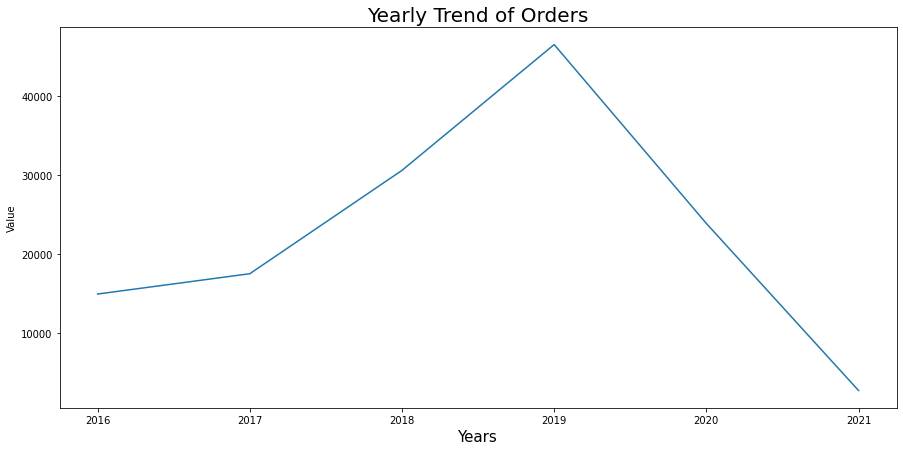

In [531]:
#Yearly Trend of Orders
grp_data_yr= merged_data.groupby('OrderYear')['Line Item'].sum().reset_index(name='count')
plt.figure(figsize=(15,7))
sns.lineplot(x=grp_data_yr['OrderYear'], y=grp_data_yr['count'])
plt.xlabel("Years", fontsize=15)
plt.ylabel("Value")
plt.title("Yearly Trend of Orders", fontsize='20')
plt.show()

Inisghts:
    
    Highest sales happend in the year 2019 and 2020, there is a drastic decrease after 2020.

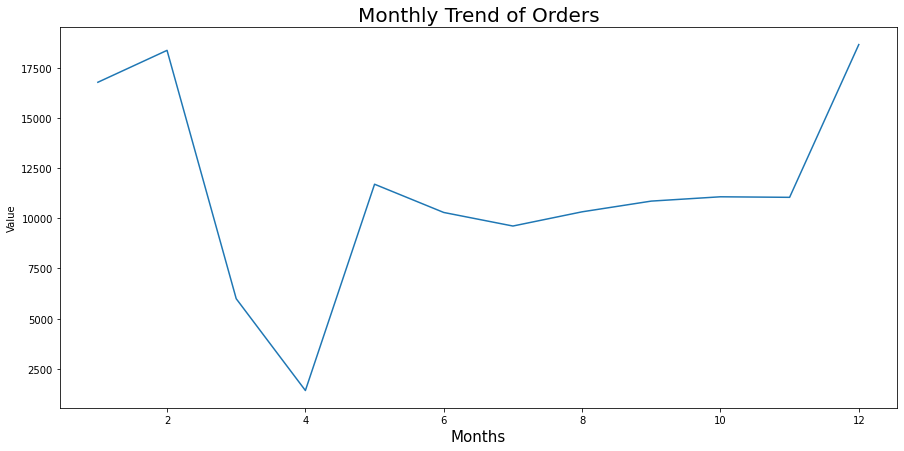

In [527]:
#Monthly Trend of Orders
grp_data_mnth= merged_data.groupby('OrderMonth')['Line Item'].sum().reset_index(name='count')
plt.figure(figsize=(15,7))
sns.lineplot(x=grp_data_mnth['OrderMonth'], y=grp_data_mnth['count'])
plt.xlabel("Months", fontsize=15)
plt.ylabel("Value")
plt.title("Monthly Trend of Orders", fontsize='20')
plt.show()

Inisghts:
    
    There is trend of decrease in orders in the 4th month(April) hike in 2nd and 12th months(Feb and Dec).

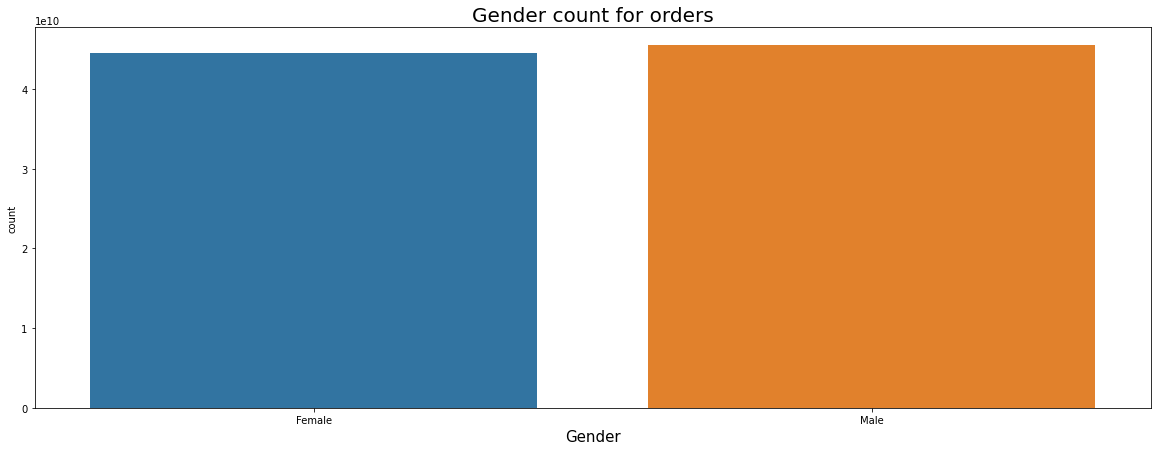

In [467]:
#Gender count for orders
plt.figure(figsize=(20,7))
sns.barplot(x=merged_data.groupby('Gender')['Order Number'].sum().index,y = merged_data.groupby('Gender')['Order Number'].sum().values)
plt.xlabel("Gender", fontsize=15)
plt.ylabel("count")
plt.title("Gender count for orders", fontsize=20)
plt.show()

Insights:
    
    Male orders are slightly more than female orders.

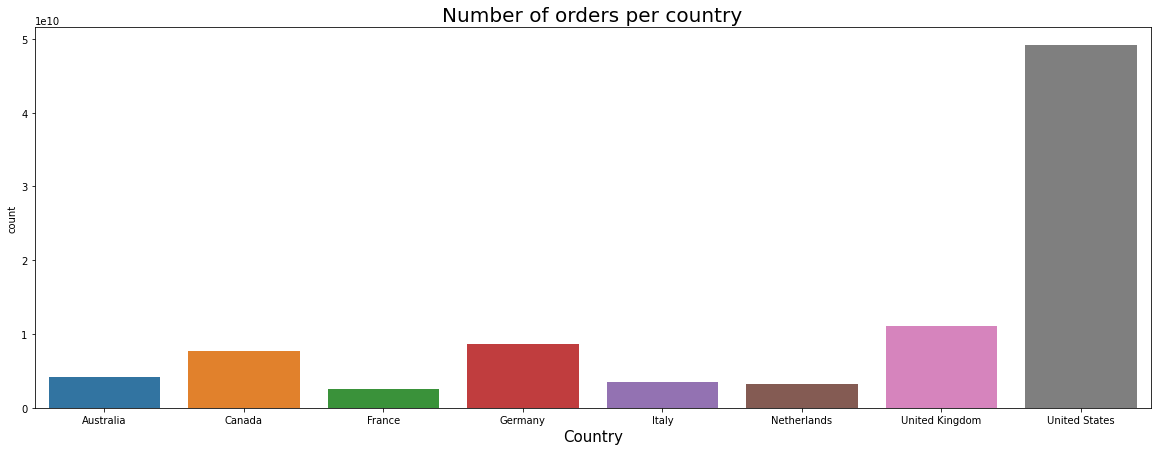

In [745]:
#Country count for orders
plt.figure(figsize=(20,7))
sns.barplot(x=merged_data.groupby('Country')['Order Number'].sum().index, y = merged_data.groupby('Country')['Order Number'].sum().values)
plt.xlabel("Country", fontsize=15)
plt.ylabel("count")
plt.title("Number of orders per country", fontsize=20)
plt.show()

Insights:
    
    UnitedStates is in the top of list of total order per country.. Next is UK, Germany and Canada.

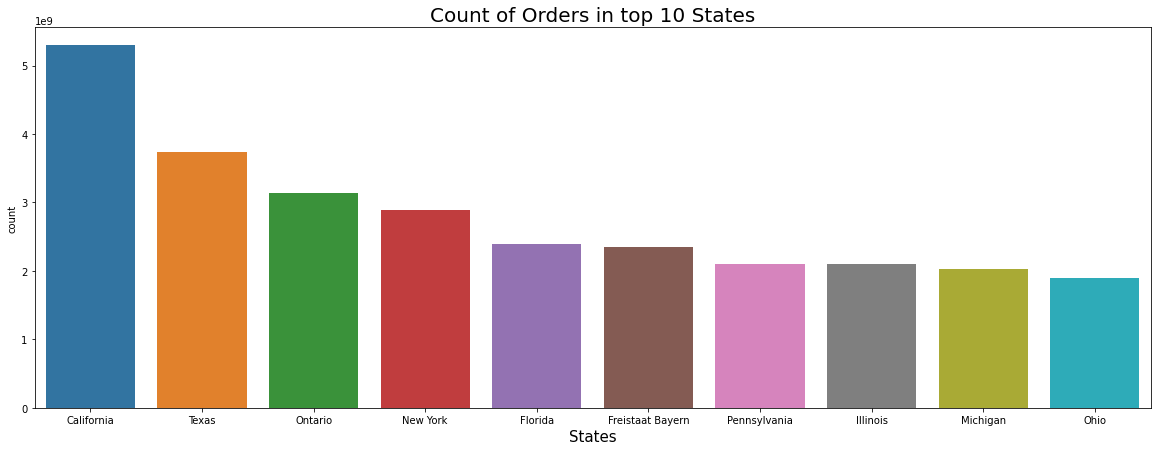

In [718]:
#top 10 State count for orders
plt.figure(figsize=(20,7))
sns.barplot(x=merged_data.groupby('State')['Order Number'].sum().sort_values(ascending=False)[0:10].index,y=merged_data.groupby('State')['Order Number'].sum().sort_values(ascending=False)[0:10].values )
plt.xlabel("States", fontsize=15)
plt.ylabel("count")
plt.title("Count of Orders in top 10 States", fontsize=20)
plt.show()

Insights:
    
    California is the state with highest number of orders and next to it is Texas and Ontario.

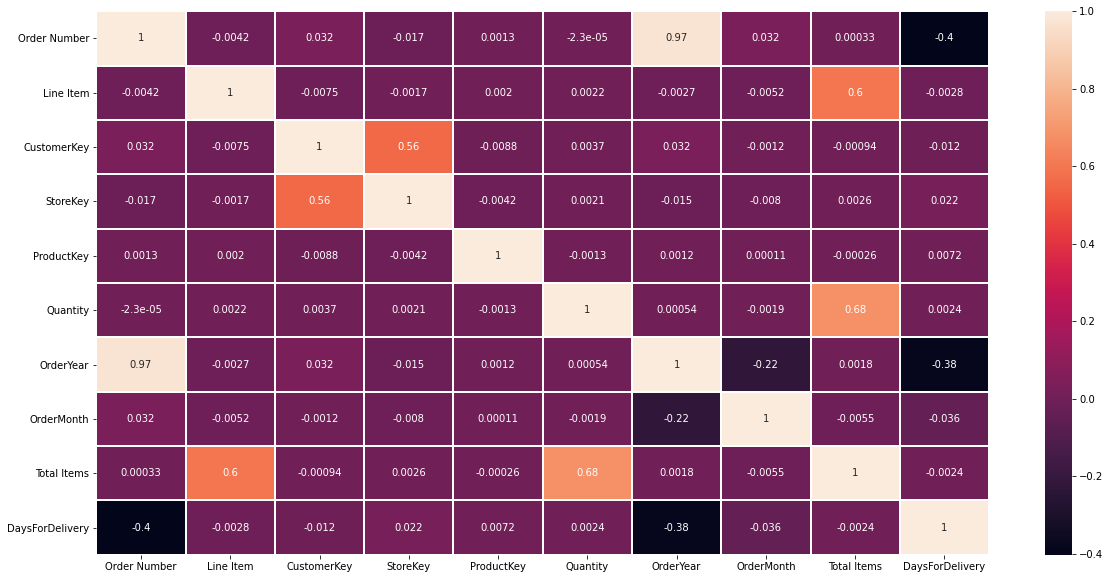

In [559]:
#Correlation matrix for merged data of sales and customers
plt.figure(figsize=(20,10))
sns.heatmap(merged_data.corr(),annot=True,linewidths=0.2, linecolor='white')
plt.show()

Insights:
    
    Correlation matrix of sales and customer data gives strong relation for customerkey and storekey, saying Customers are store centric.
    

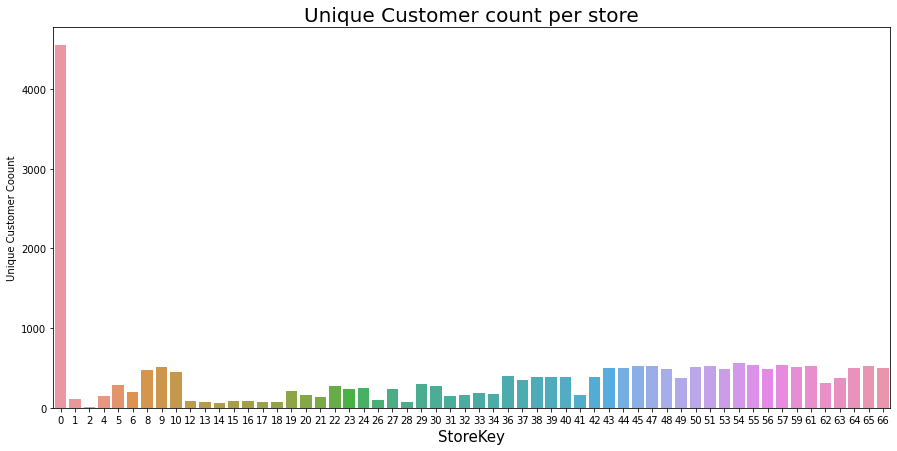

In [736]:
#Store vs customers
grp_store_cust= merged_data.groupby('StoreKey')['CustomerKey'].nunique().reset_index(name='count')
plt.figure(figsize=(15,7))
sns.barplot(x=grp_store_cust['StoreKey'], y=grp_store_cust['count'])
plt.xlabel("StoreKey", fontsize=15)
plt.ylabel("Unique Customer Coount")
plt.title("Unique Customer count per store", fontsize='20')
plt.show()


Insights:
    
    Store 0 is having highest number of customers.

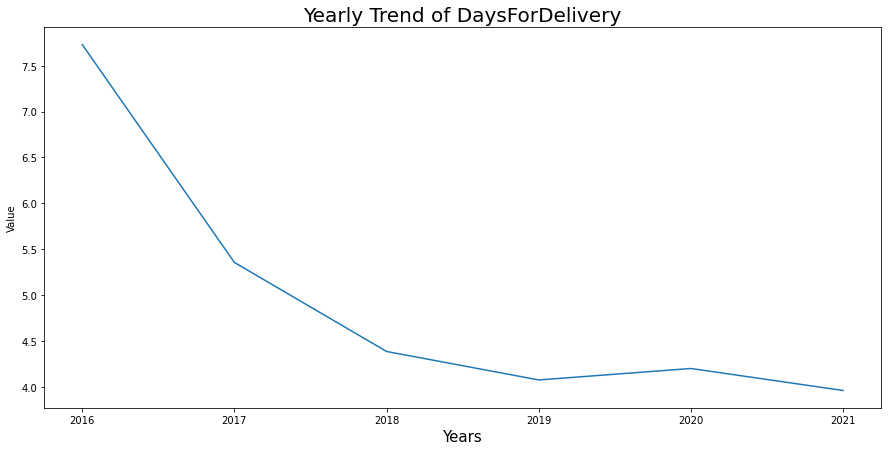

In [722]:
#Yearly Trend of DaysForDelivery
grp_data_Dd= merged_data.groupby('OrderYear')['DaysForDelivery'].mean().reset_index(name='count')
plt.figure(figsize=(15,7))
sns.lineplot(x=grp_data_Dd['OrderYear'], y=grp_data_Dd['count'])
plt.xlabel("Years", fontsize=15)
plt.ylabel("Value")
plt.title("Yearly Trend of DaysForDelivery", fontsize='20')
plt.show()

Insights:
    
    The number of days reuired for delivery from 2016 gradually decreased saying that the access for delivery became easy.
    Till 2019 the average days of delivery per year decreased but increased in the year 2020 due to the pandemic stituations which are againn set back in the year 2021.

### Merging Product with Sales and Customer

In [585]:
#merging sales and product datasets
sale_prod_data =  pd.merge(merged_data, prod, on='ProductKey')

In [586]:
sale_prod_data.shape

(62884, 33)

The total rows after merging are 62884 and 33 columns

In [587]:
sale_prod_data.columns

Index(['Order Number', 'Line Item', 'Order Date', 'Delivery Date',
       'CustomerKey', 'StoreKey', 'ProductKey', 'Quantity', 'Currency Code',
       'OrderYear', 'OrderMonth', 'Total Items', 'DaysForDelivery', 'Gender',
       'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country',
       'Continent', 'Birthday', 'year', 'Product Name', 'Brand', 'Color',
       'Unit Cost USD', 'Unit Price USD', 'SubcategoryKey', 'Subcategory',
       'CategoryKey', 'Category', 'profit'],
      dtype='object')

In [588]:
sale_prod_data.head()

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,OrderYear,...,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,profit
0,366000,1,2016-01-01,2016-01-13,265598,10,1304,1,CAD,2016,...,Contoso Lens Adapter M450 White,Contoso,White,1.27,8.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,6.73
1,378002,2,2016-01-13,2016-01-24,1599716,45,1304,1,USD,2016,...,Contoso Lens Adapter M450 White,Contoso,White,1.27,8.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,6.73
2,1673007,2,2019-07-31,2019-08-03,1617106,61,1304,9,USD,2019,...,Contoso Lens Adapter M450 White,Contoso,White,1.27,8.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,6.73
3,1816030,1,2019-12-21,2019-12-24,946719,0,1304,1,GBP,2019,...,Contoso Lens Adapter M450 White,Contoso,White,1.27,8.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,6.73
4,868008,2,2017-05-17,2017-05-21,1540067,51,1304,1,USD,2017,...,Contoso Lens Adapter M450 White,Contoso,White,1.27,8.0,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,6.73


Calculating totalPurchase column from TotalItems and UnitPriceUSD .
TotalProfit from profit and TotalItems columns.

In [595]:
sale_prod_data['TotalPurchase']=sale_prod_data['Total Items']*sale_prod_data['Unit Price USD']

In [589]:
sale_prod_data['TotalProfit']= sale_prod_data['profit']*sale_prod_data['Total Items']

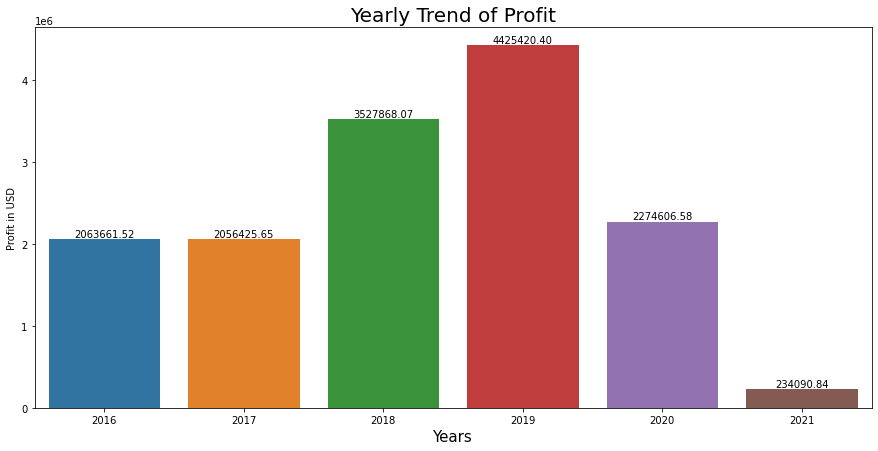

In [591]:
#Yearly Trend of Profit
plt.figure(figsize=(15,7))
ax = sns.barplot(x=sale_prod_data.groupby('OrderYear')['TotalProfit'].sum().index, y=sale_prod_data.groupby('OrderYear')['TotalProfit'].sum().values)
# Get container object (assuming single container plot)
container = ax.containers[0]

# Add values as labels on bars
ax.bar_label(container, fmt='{:.2f}')  # Format to display two decimal places

plt.xlabel("Years", fontsize=15)
plt.ylabel("Profit in USD")
plt.title("Yearly Trend of Profit", fontsize='20')
plt.show()

Insights:
    
        Like the sales the trend of profits is also high in the year 2019 and almost halved in 2020 and nearly 5% of the profit of 2019.

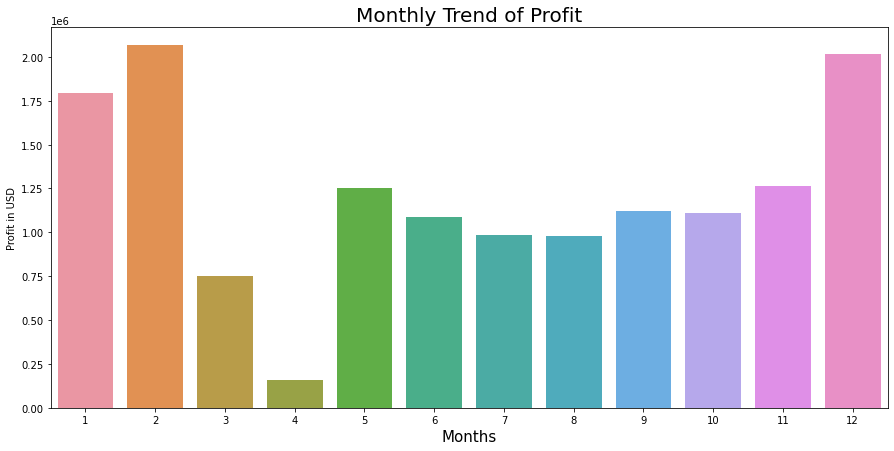

In [592]:
#Monthly Trend of Profit
plt.figure(figsize=(15,7))
sns.barplot(x=sale_prod_data.groupby('OrderMonth')['TotalProfit'].sum().index, y=sale_prod_data.groupby('OrderMonth')['TotalProfit'].sum().values)
plt.xlabel("Months", fontsize=15)
plt.ylabel("Profit in USD")
plt.title("Monthly Trend of Profit", fontsize='20')
plt.show()

Insights:
    
    The trend of profits follows the orders. The Profits are least in the month of April and highest in the month of Dec and Feb.

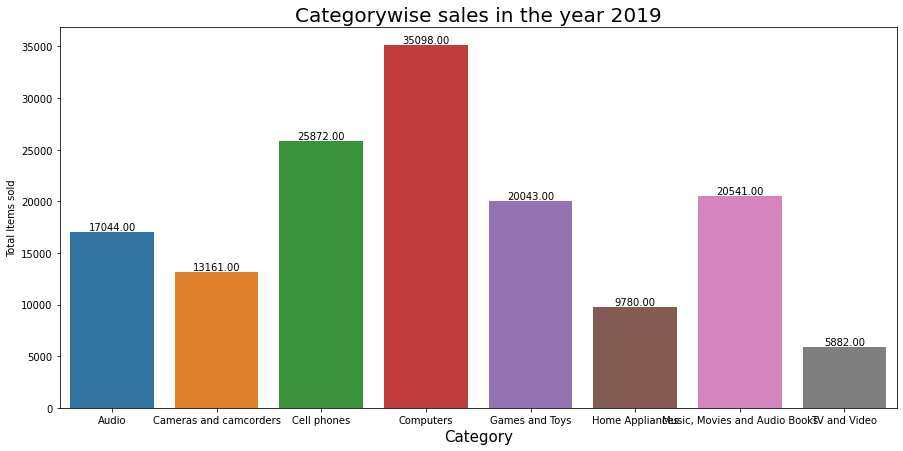

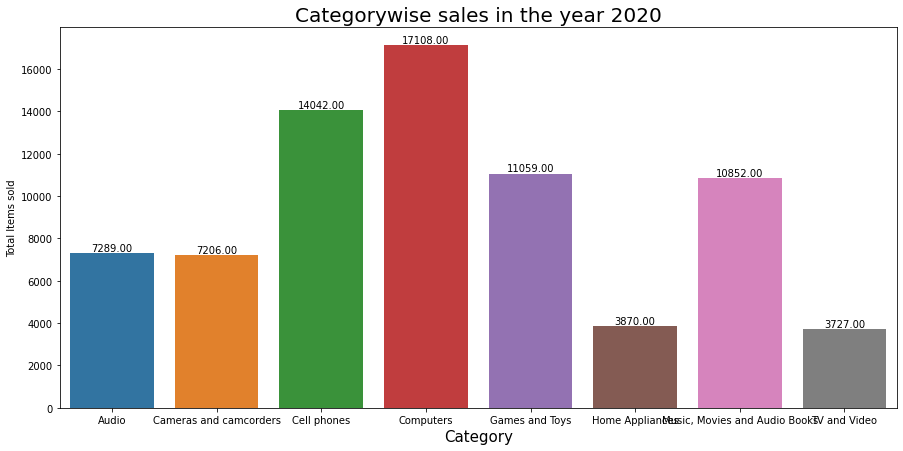

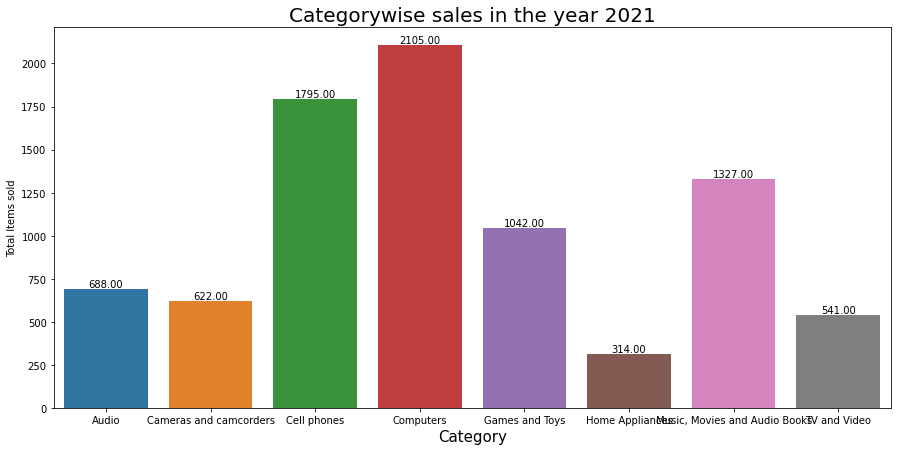

In [593]:
#Categorywise sales for years 2019, 2020, 2021
for i in [2019,2020,2021]:
    data = sale_prod_data[sale_prod_data['OrderYear']==i]
    plt.figure(figsize=(15,7))
    ax=sns.barplot(x=data.groupby('Category')['Total Items'].sum().index, y=data.groupby('Category')['Total Items'].sum().values)
    container = ax.containers[0]
    ax.bar_label(container, fmt='{:.2f}')  
    plt.xlabel("Category", fontsize=15)
    plt.ylabel("Total Items sold")
    plt.title(f"Categorywise sales in the year {i}", fontsize='20')
    plt.show()

In [ ]:
Insights:
    
    The category wise sales for the Category 'Computers' decreased from 35000 items to 2100 from year 2019 to 2021. The sales almost decreases by 16 times. 

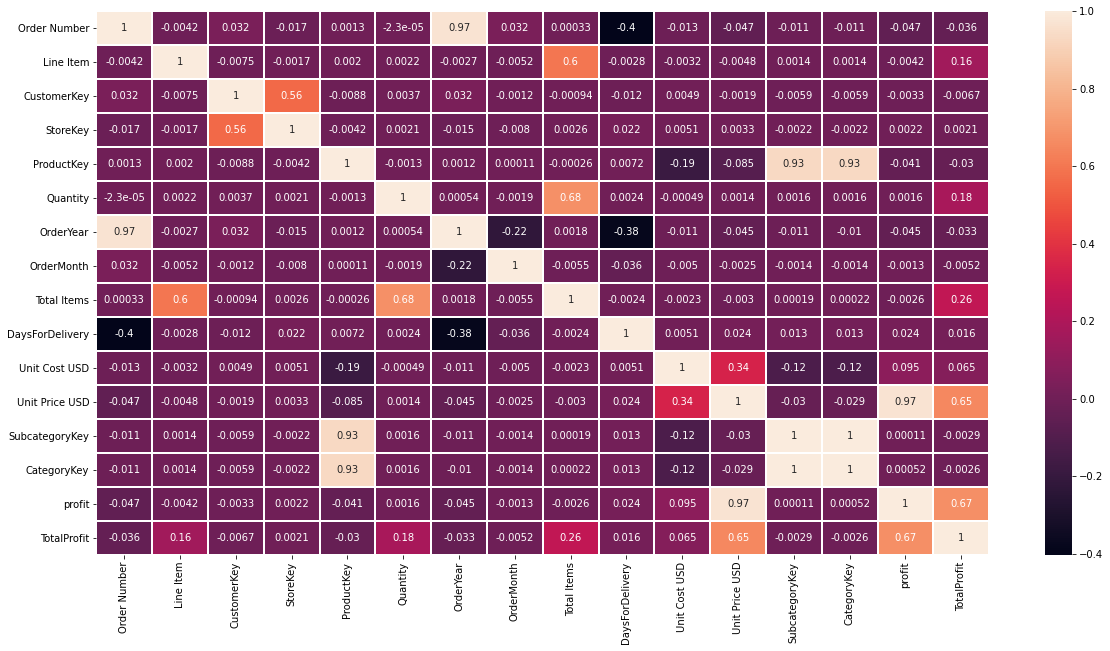

In [594]:
plt.figure(figsize=(20,10))
sns.heatmap(sale_prod_data.corr(),annot=True,linewidths=0.2, linecolor='white')
plt.show()

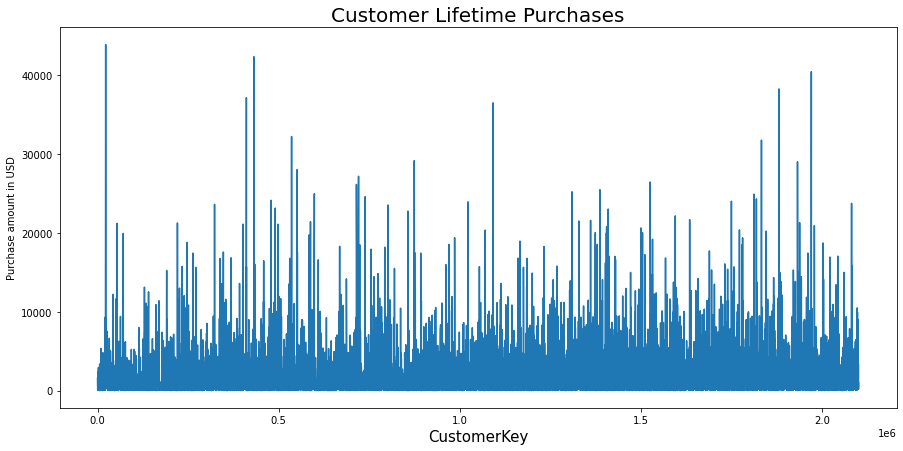

In [597]:
grp_data_cust= sale_prod_data.groupby('CustomerKey')['TotalPurchase'].sum().reset_index(name='count')
plt.figure(figsize=(15,7))
sns.lineplot(x=grp_data_cust['CustomerKey'], y=grp_data_cust['count'])
plt.xlabel("CustomerKey", fontsize=15)
plt.ylabel("Purchase amount in USD")
plt.title("Customer Lifetime Purchases", fontsize='20')
plt.show()

Insights:
    
    This is the graph for Customer life time purchases based on which we can segment the customers into loyal and random customers.

In [602]:
#let us take customers whose life time purchase is >10000 USD
cust_lf_pur = sale_prod_data.groupby('CustomerKey')['TotalPurchase'].sum().sort_values(ascending=False).reset_index(name='amount')

In [615]:
#loyal or high valued customers whose lifetimepurchase>10000 USD
loyal_customers=cust_lf_pur[cust_lf_pur.amount>10000].CustomerKey
len(loyal_customers)

263

In [620]:
#loyal customers whose lifetimepurchase>10000 USD
random_customers=cust_lf_pur[cust_lf_pur.amount<10000].CustomerKey
len(random_customers)

11624

In [613]:
#Extracting Loyal customer data bbased on customer keys from loyal customers
loyal_customer_data = sale_prod_data[sale_prod_data['CustomerKey'].isin(loyal_customers)]

In [621]:
#Extracting Random customer data bbased on customer keys from random customers
random_customer_data = sale_prod_data[sale_prod_data['CustomerKey'].isin(random_customers)]

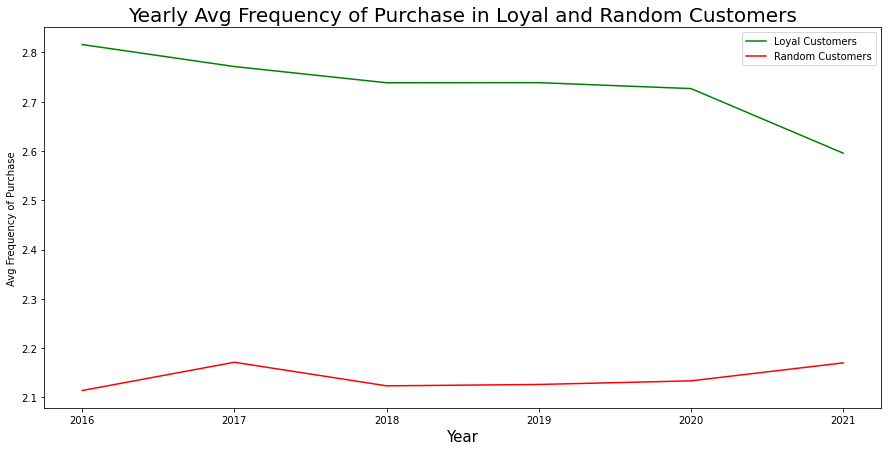

In [628]:
#Yearly Avg Frequency of Purchase in Loyal and Random Customers
lyl_data_yr= loyal_customer_data.groupby('OrderYear')['Line Item'].mean().reset_index(name='count')

randm_data_yr= random_customer_data.groupby('OrderYear')['Line Item'].mean().reset_index(name='count')

plt.figure(figsize=(15,7))
sns.lineplot(x=lyl_data_yr['OrderYear'], y=lyl_data_yr['count'], color='g',label='Loyal Customers')
sns.lineplot(x=randm_data_yr['OrderYear'], y=randm_data_yr['count'], color='r',label='Random Customers')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg Frequency of Purchase")
plt.title("Yearly Avg Frequency of Purchase in Loyal and Random Customers", fontsize='20')
plt.show()

Insights:
    
    The yearly average purchases in loyal customers decrease from yaer 2020 saying that it will be the reason for decline in the revenue genereation after 2020.

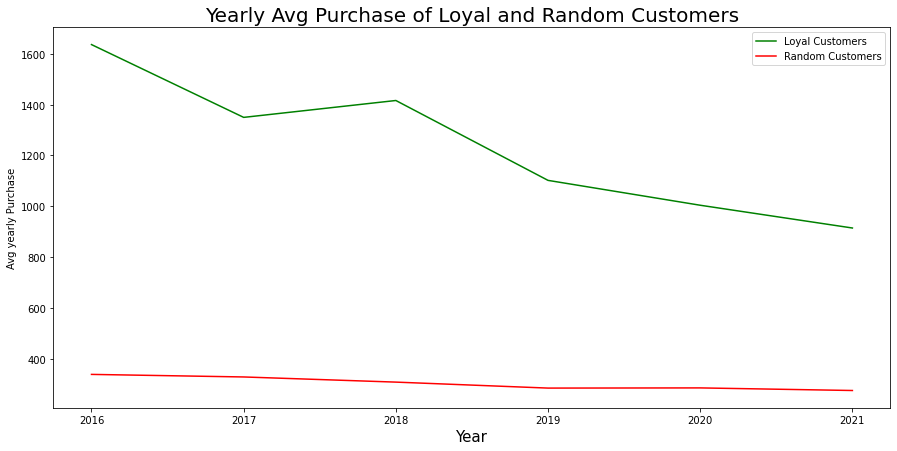

In [746]:
#Yearly Avg Purchase of Loyal and Random Customers
lyl_data_yr= loyal_customer_data.groupby('OrderYear')['TotalPurchase'].mean().reset_index(name='count')

randm_data_yr= random_customer_data.groupby('OrderYear')['TotalPurchase'].mean().reset_index(name='count')

plt.figure(figsize=(15,7))
sns.lineplot(x=lyl_data_yr['OrderYear'], y=lyl_data_yr['count'], color='g',label='Loyal Customers')
sns.lineplot(x=randm_data_yr['OrderYear'], y=randm_data_yr['count'], color='r',label='Random Customers')
plt.xlabel("Year", fontsize=15)
plt.ylabel("Avg yearly Purchase")
plt.title("Yearly Avg Purchase of Loyal and Random Customers", fontsize='20')
plt.show()

Insights:
    
    From the above plot of customer loyality defined in the terms of amount of purchase over the year, it is observed that the trend of purchases got declined after 2020 from 1600 to 1000 which will be an amount of $600*263(loyalcustomers)= $157800 decrease in the revenue. 

In [638]:
#taking highest avg for loyal customers
high_avg = loyal_customer_data.groupby('OrderYear')['TotalPurchase'].mean().sort_values(ascending=False).reset_index(name='count')['count'][0]
high_avg

1636.748404494382

In [640]:
#taking lowest avg for loyal customers
low_avg = loyal_customer_data.groupby('OrderYear')['TotalPurchase'].mean().sort_values(ascending=True).reset_index(name='count')['count'][0]
low_avg

914.5095505617978

In [642]:
#Contribution of loyal cutomers for purchases per year
loyal_pur_contrbution = (high_avg-low_avg)*len(loyal_customers)
loyal_pur_contrbution

189948.8185842696

In [645]:
#Percentage of loyal cutomers for purchases per year
prcnt_role_loyl_cust = (loyal_pur_contrbution/profit_decline_2020)*100
prcnt_role_loyl_cust

9.308862002761538

Insights:

    There is approximately 9.3% decrease in profits due to loyal customers. That means there should be some measures taken for loyal customer engagement so that the number of avg purchases increases, increasing the revenue from the loyal customer end.

In [648]:
#taking highest avg for random customers
high_avg_ran = random_customer_data.groupby('OrderYear')['TotalPurchase'].mean().sort_values(ascending=False).reset_index(name='count')['count'][0]
high_avg_ran

338.1163405572714

In [649]:
#taking lowest avg for random customers
low_avg_ran = random_customer_data.groupby('OrderYear')['TotalPurchase'].mean().sort_values(ascending=True).reset_index(name='count')['count'][0]
low_avg_ran

274.6891718610862

In [650]:
#Contribution of random cutsomers for purchases per year
ran_pur_contrbution = (high_avg_ran-low_avg_ran)*len(random_customers)
ran_pur_contrbution

737277.408924457

In [651]:
#Percentage of random cutsomers for purchases per year
prcnt_role_ran_cust = (ran_pur_contrbution/profit_decline_2020)*100
prcnt_role_ran_cust

36.13191020920478

Insights:

    There is approximately 36% decrease in profits due to random customers. That means there should be some measures taken for random customer retention so that the number of avg purchases increases, increasing the revenue from the random customer end.

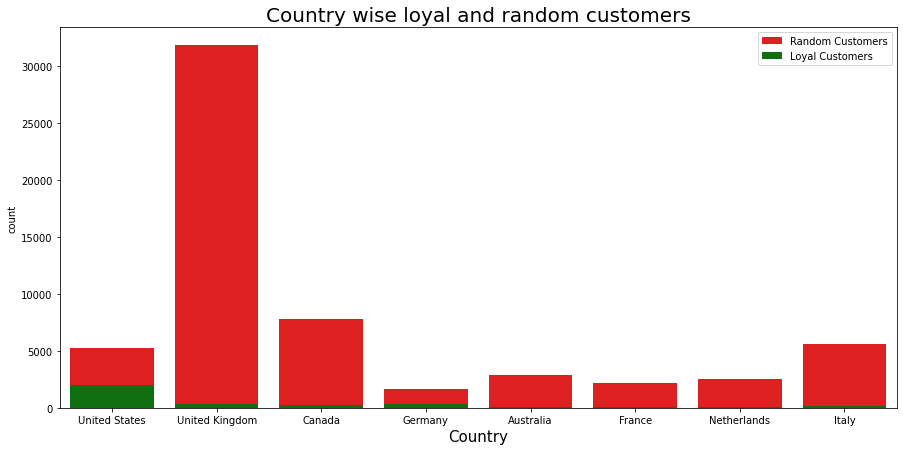

In [747]:
#loyal customers from which country
plt.figure(figsize=(15,7))
sns.countplot(x=random_customer_data.Country,color='r',label='Random Customers')
sns.countplot(x=loyal_customer_data.Country,color='g', label='Loyal Customers')
plt.legend()
plt.xlabel("Country", fontsize=15)
plt.title("Country wise loyal and random customers", fontsize=20)
plt.show()


Insights:
    
    US has a near equal number of loyal and random customers. and all the other countries are domiated with random customers,

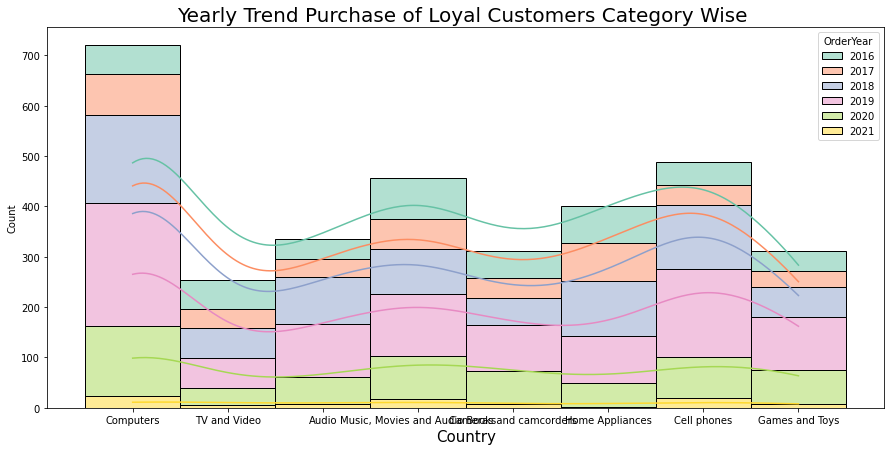

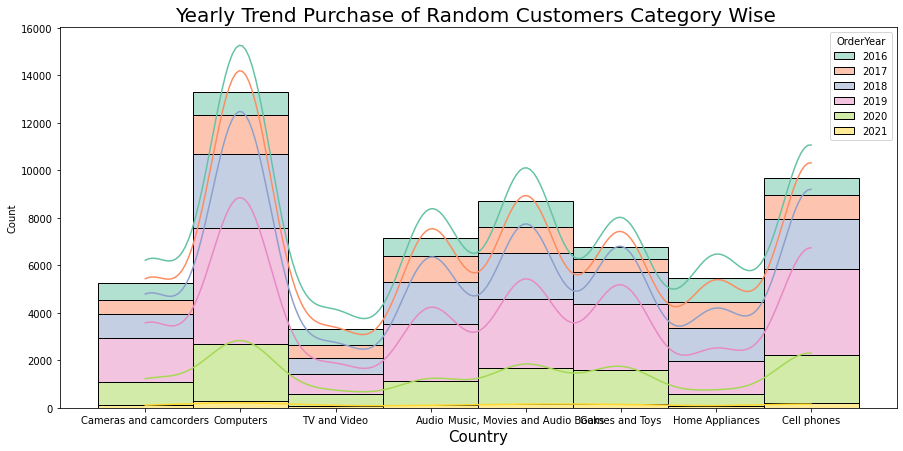

In [717]:
#loyal customers purchase in each category for all years
plt.figure(figsize=(15,7))
sns.histplot(x=loyal_customer_data.Category, hue= loyal_customer_data['OrderYear'], kde=True ,palette='Set2',multiple="stack")
plt.xlabel("Country", fontsize=15)
plt.title("Yearly Trend Purchase of Loyal Customers Category Wise ", fontsize=20)
plt.show()

#Random customers purchase in each category for all years
plt.figure(figsize=(15,7))
sns.histplot(x=random_customer_data.Category, hue= random_customer_data['OrderYear'], kde=True ,palette='Set2',multiple="stack"  )
plt.xlabel("Country", fontsize=15)
plt.title("Yearly Trend Purchase of Random Customers Category Wise ", fontsize=20)
plt.show()

In [ ]:
Insights:
    
    The yearly trend of loyal and random customers based on category is shown in the above plots.
    Fromt above plots it is observed that the purchases in all the categories decreased in case of both loyal and random customers.